## California DataSet

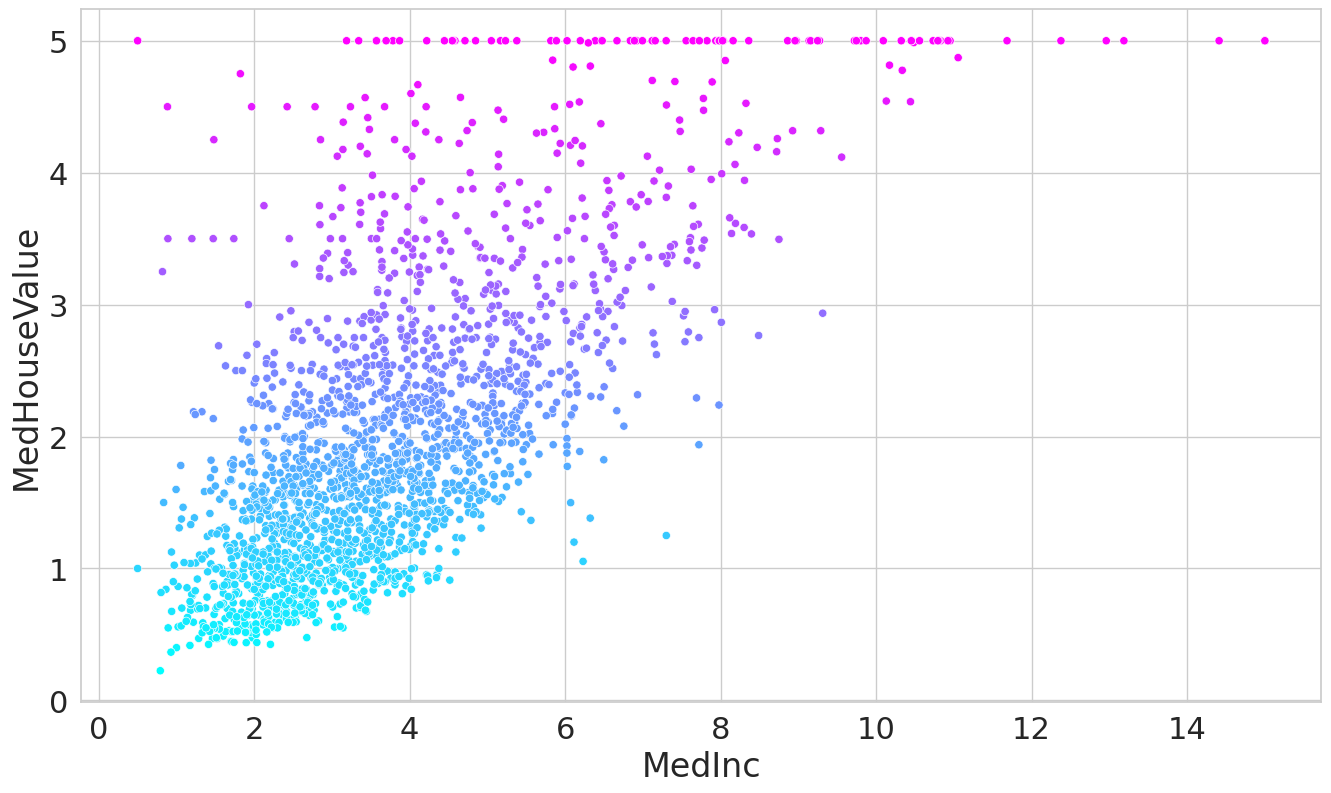

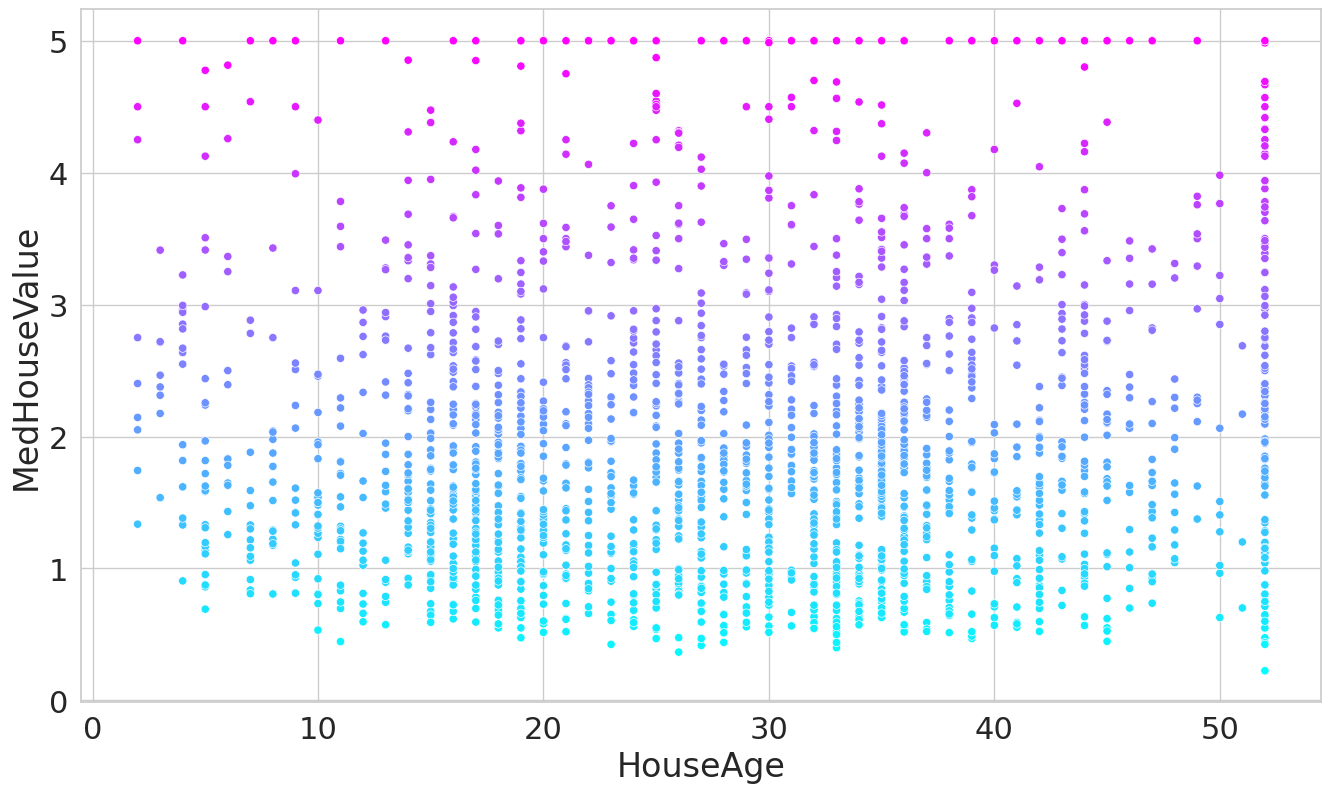

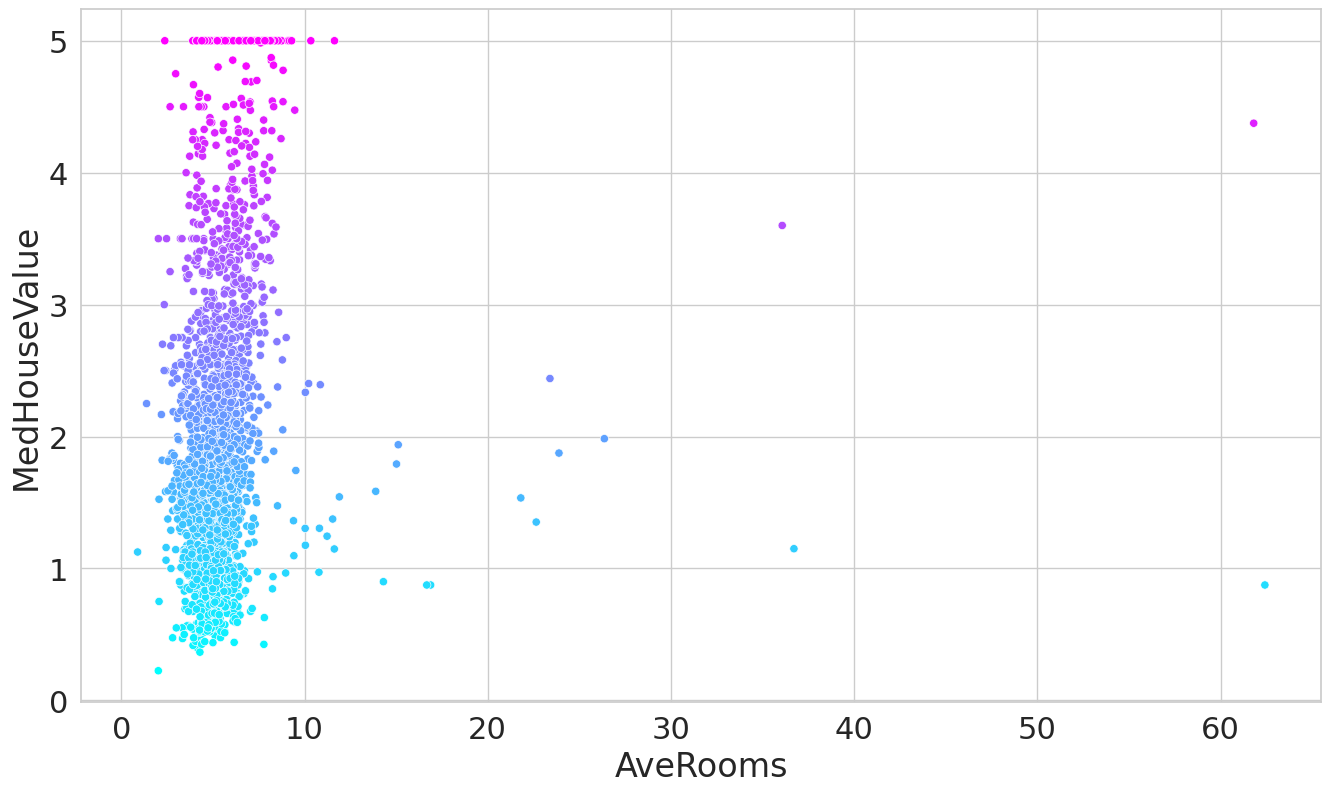

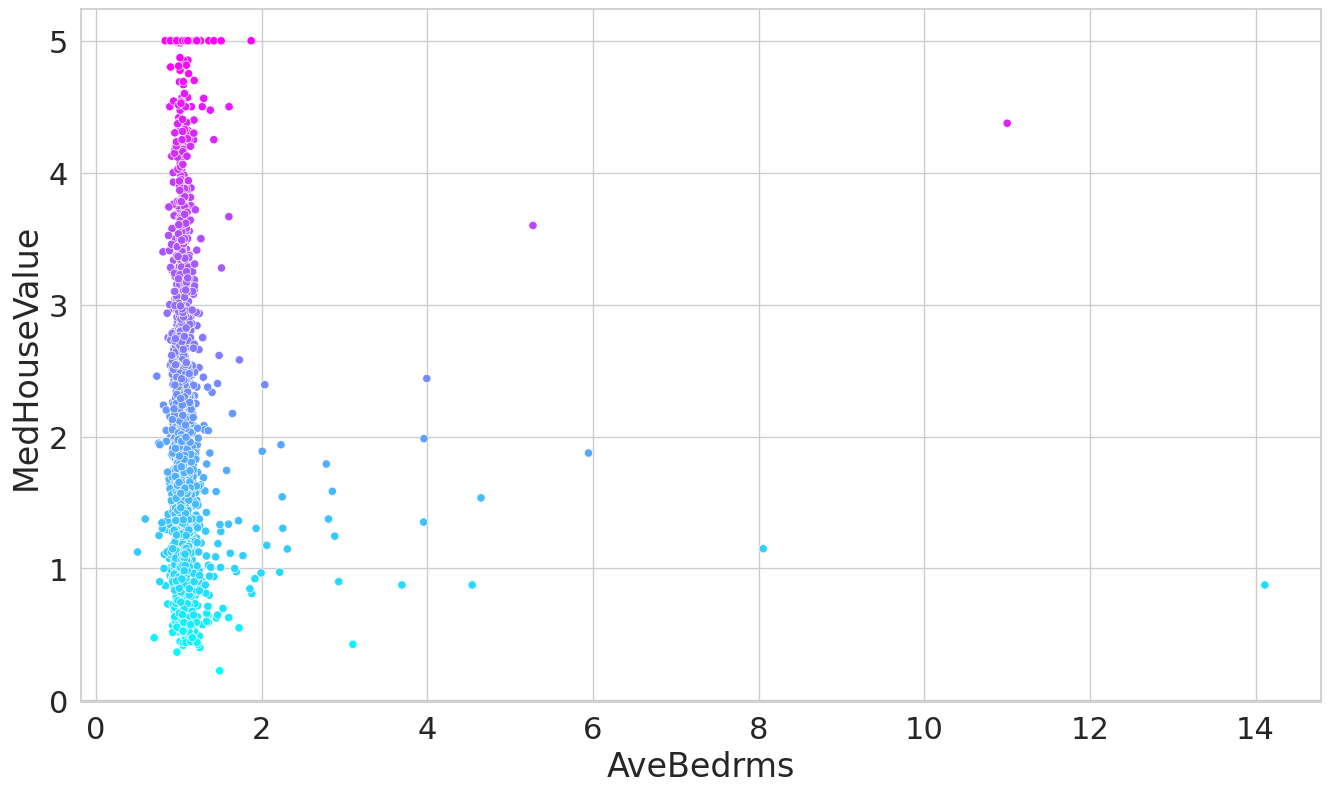

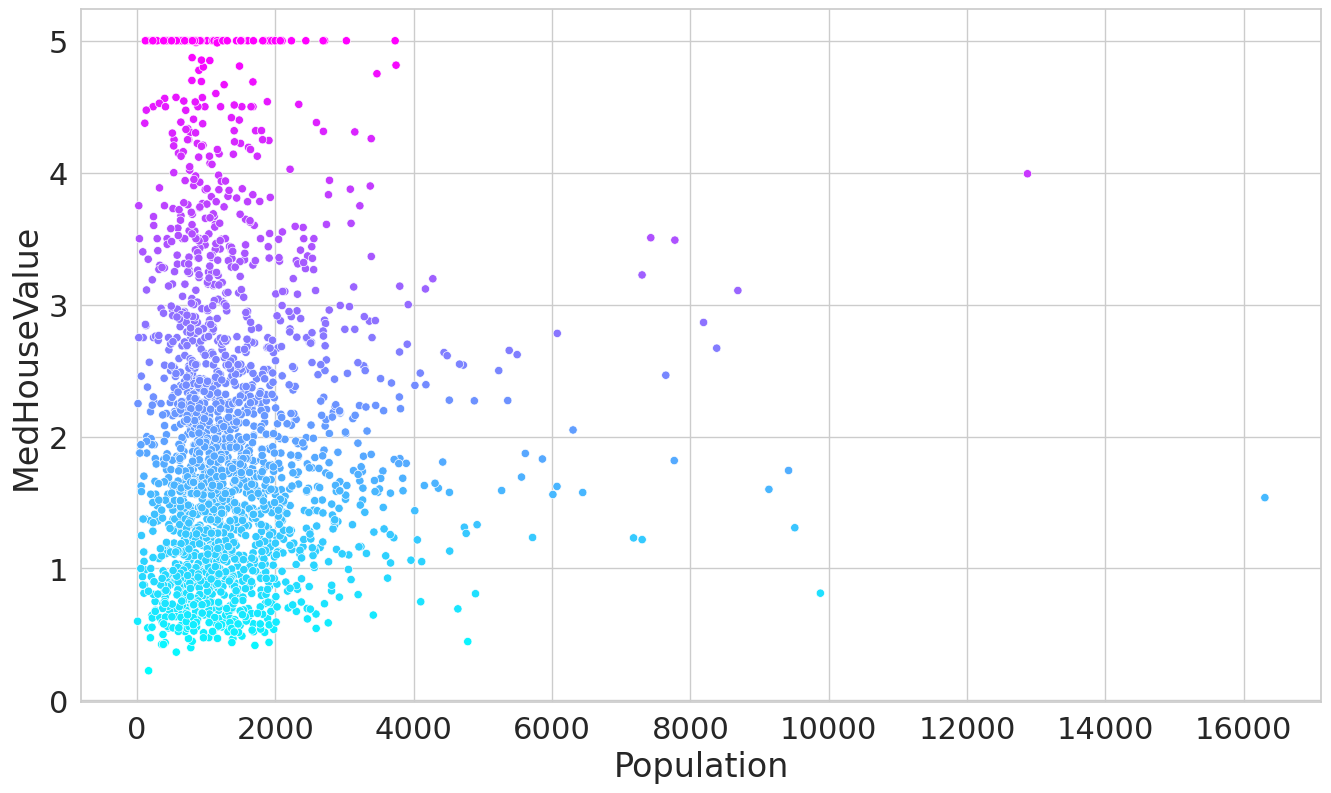

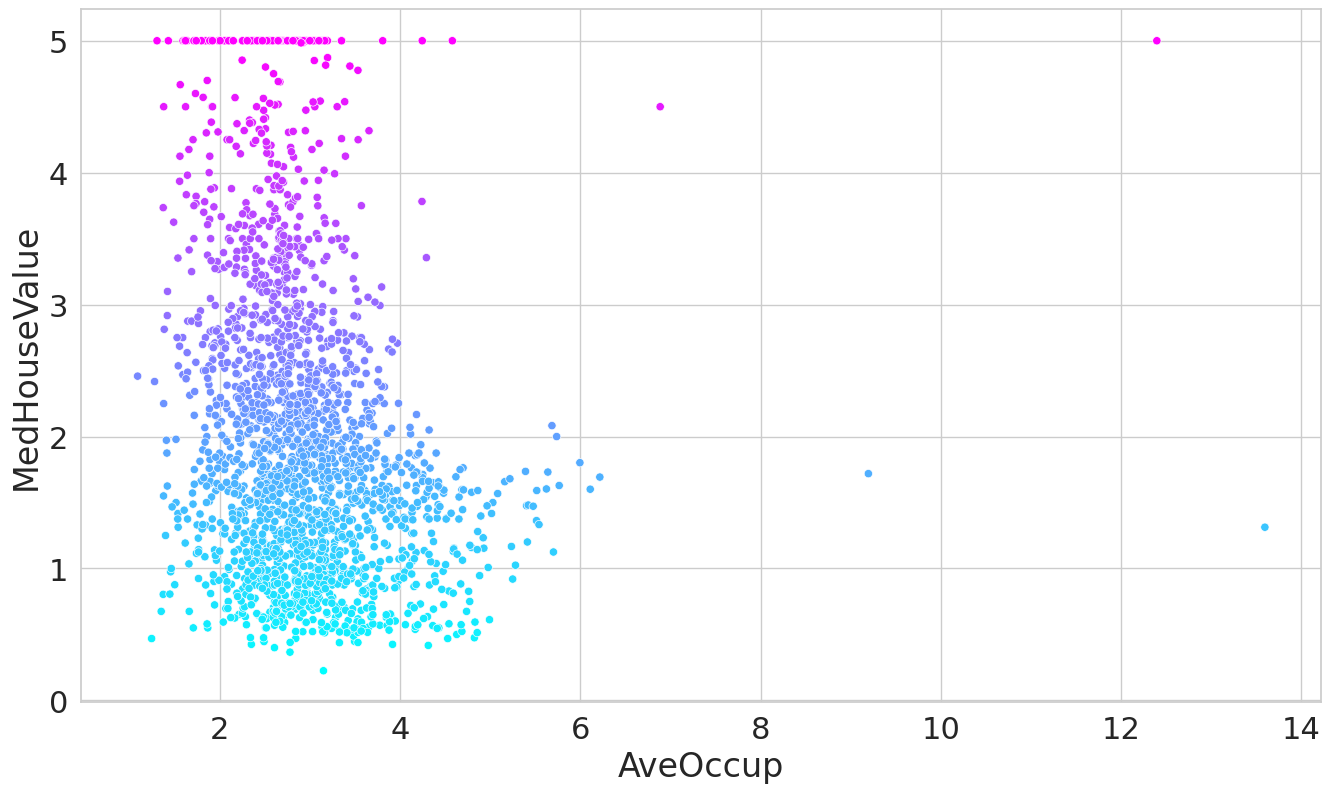

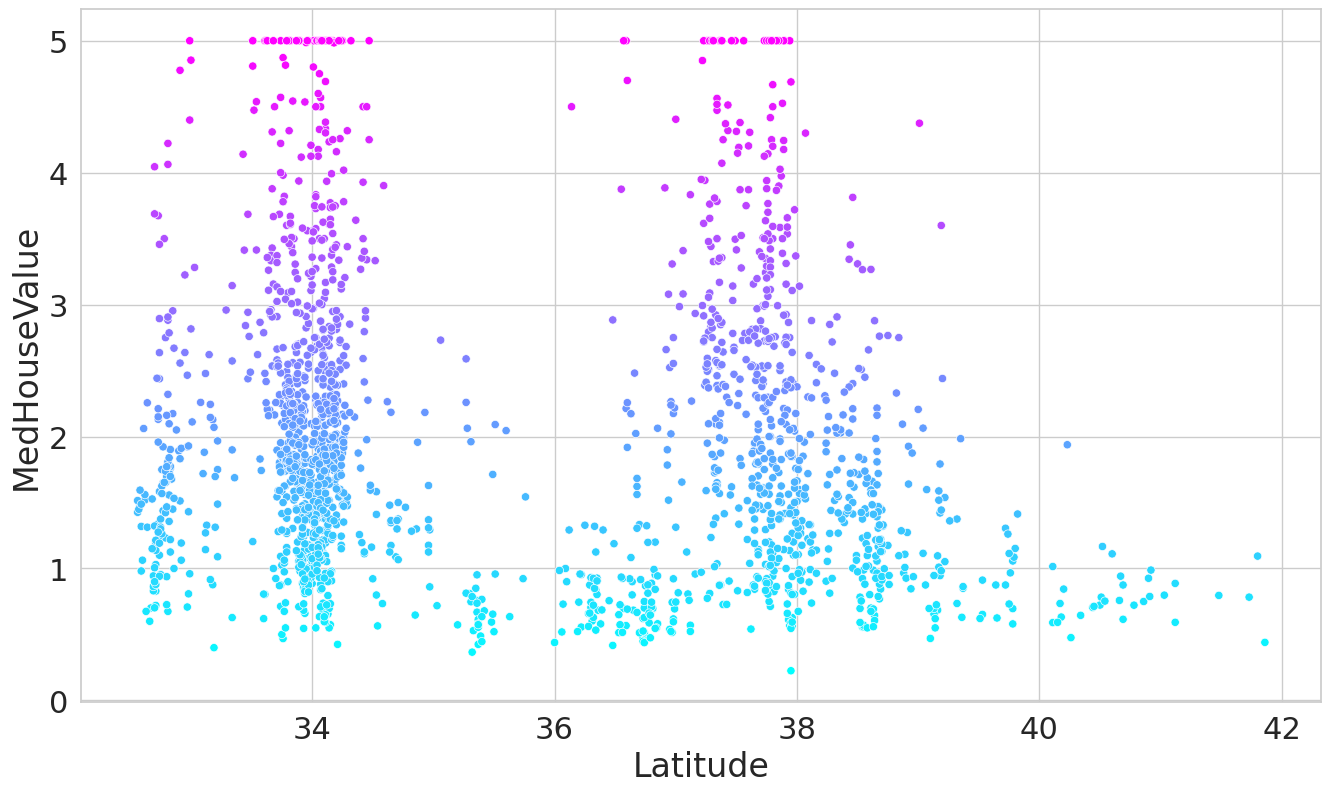

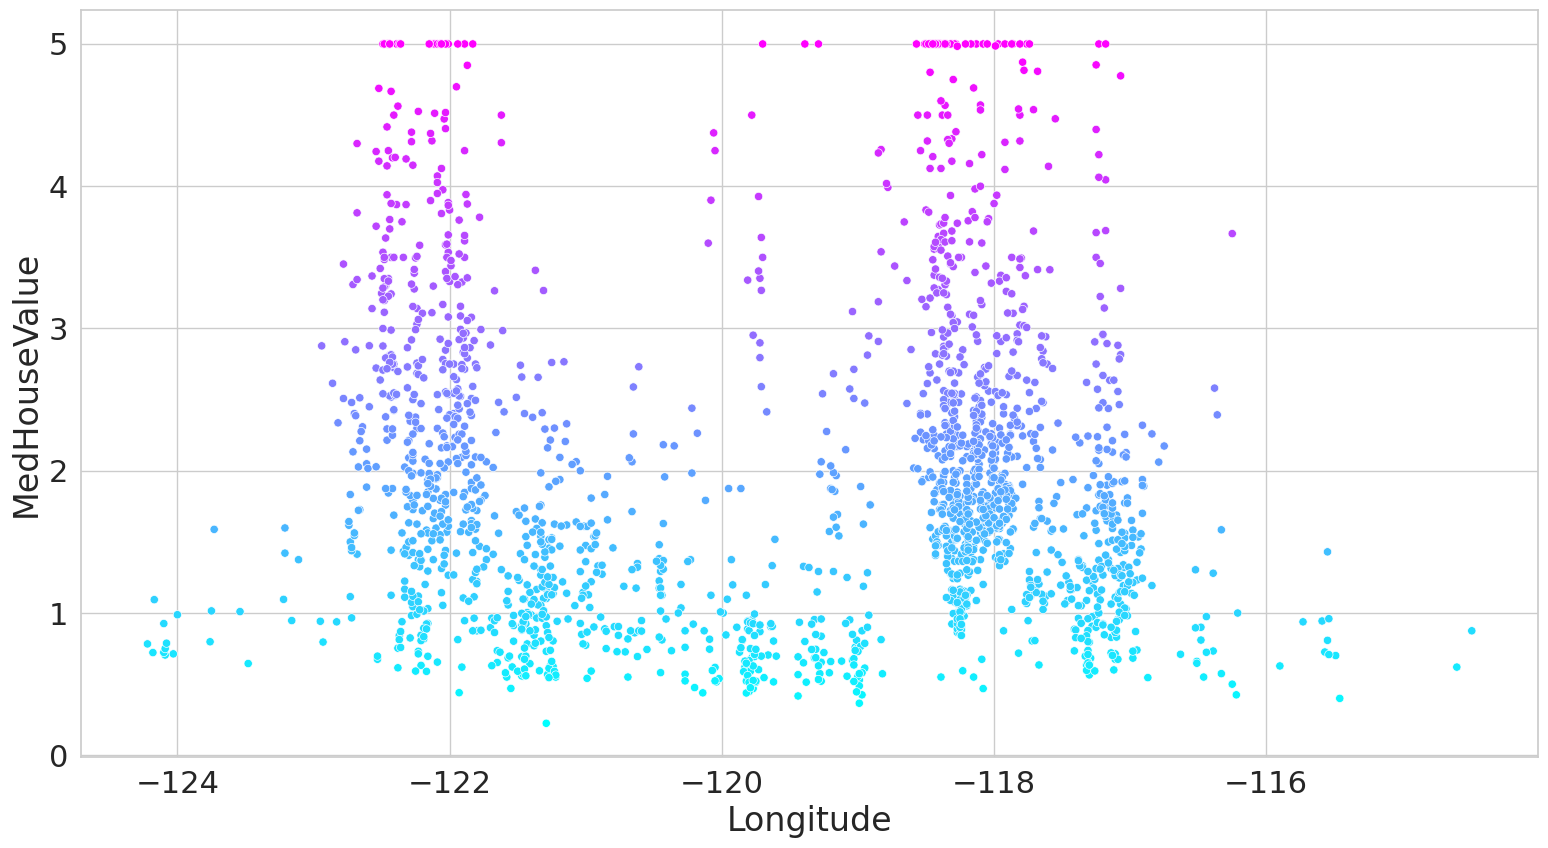

In [37]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# print(len(california)) #6

# for i in california:
#     print(i)
'''
data
target
frame
target_names
feature_names
DESCR
'''

# print(california.DESCR)

'''
**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html...
'''

# print(california.feature_names) #['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
# print(california.data.shape) #(20640, 8) There are 20,640 rows and 8 columns
# print(california.target.shape) #(20640,) Target values are the median house values

import pandas as pd
pd.set_option('display.precision', 4) #'precision' is the maximum number of digits to display to the right of each decimal point.
pd.set_option('display.max_columns', 9) # 9th column is variable Y: median house value. Depends on previous 8.
'''
We’ll have nine columns in the DataFrame — the eight dataset features in california.data and an 
additional column for the target median house values (california.target).
'''
pd.set_option('display.width', None) #The value None tells pandas to auto-detect the display width when formatting string representations of Series and DataFrames.

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
# print(california_df.head(10))
'''
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0    6.9841     1.0238       322.0    2.5556     37.88   
1  8.3014      21.0    6.2381     0.9719      2401.0    2.1098     37.86   
2  7.2574      52.0    8.2881     1.0734       496.0    2.8023     37.85   
3  5.6431      52.0    5.8174     1.0731       558.0    2.5479     37.85   
4  3.8462      52.0    6.2819     1.0811       565.0    2.1815     37.85   
5  4.0368      52.0    4.7617     1.1036       413.0    2.1399     37.85   
6  3.6591      52.0    4.9319     0.9514      1094.0    2.1284     37.84   
7  3.1200      52.0    4.7975     1.0618      1157.0    1.7883     37.84   
8  2.0804      42.0    4.2941     1.1176      1206.0    2.0269     37.84   
9  3.6912      52.0    4.9706     0.9902      1551.0    2.1723     37.84   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
5    -122.25          2.697  
6    -122.25          2.992  
7    -122.25          2.414  
8    -122.26          2.267  
9    -122.25          2.611 
'''


# print(california_df.describe())
'''
           MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000   
mean       3.8707     28.6395      5.4290      1.0967   1425.4767      3.0707   
std        1.8998     12.5856      2.4742      0.4739   1132.4621     10.3860   
min        0.4999      1.0000      0.8462      0.3333      3.0000      0.6923   
25%        2.5634     18.0000      4.4407      1.0061    787.0000      2.4297   
50%        3.5348     29.0000      5.2291      1.0488   1166.0000      2.8181   
75%        4.7432     37.0000      6.0524      1.0995   1725.0000      3.2823   
max       15.0001     52.0000    141.9091     34.0667  35682.0000   1243.3333   

         Latitude   Longitude  MedHouseValue  
count  20640.0000  20640.0000     20640.0000  
mean      35.6319   -119.5697         2.0686  
std        2.1360      2.0035         1.1540  
min       32.5400   -124.3500         0.1500  
25%       33.9300   -121.8000         1.1960  
50%       34.2600   -118.4900         1.7970  
75%       37.7100   -118.0100         2.6472  
max       41.9500   -114.3100         5.0000  
'''


sample_df = california_df.sample(frac=0.1, random_state=17)
'''
To make our visualizations clearer, let’s use DataFrame method sample to randomly select 10% of the 20,640 samples for graphing purposes
'''

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid') # White BG with grids
for feature in california.feature_names:
    plt.figure(figsize=(16, 9)) # height and width
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)
plt.tight_layout()
plt.show()



_________________
## Training and Testing

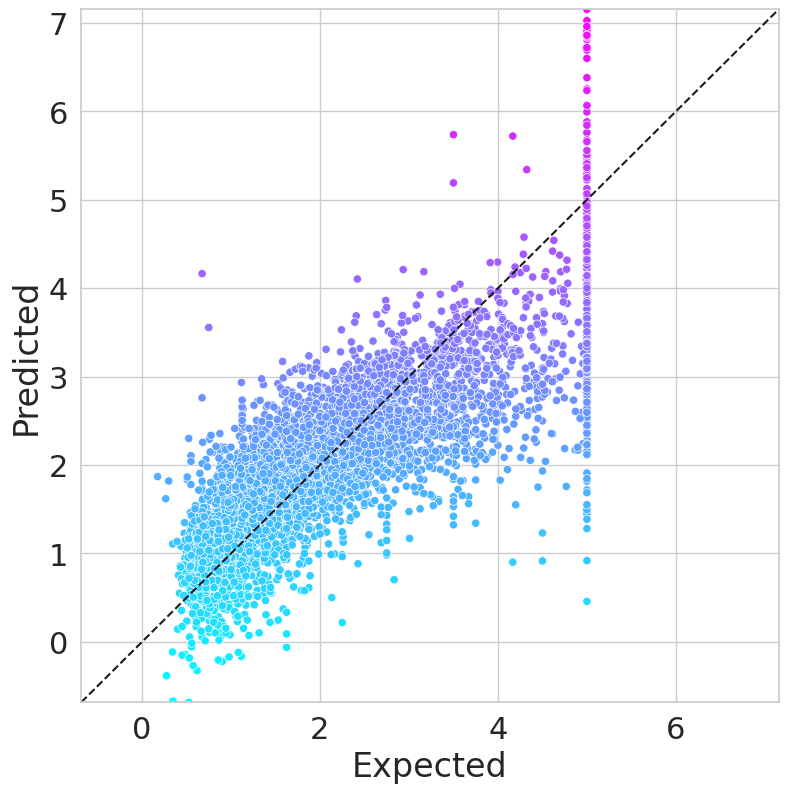

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)
# print(X_train.shape) #(15480, 8) 75% of 20640 data points
# print(X_test.shape) #(5160, 8)
# print(y_train.shape) #(15480,)
# print(y_test.shape) #(5160,)

from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
# for i, name in enumerate(california.feature_names):
#     print(f'{name:>10}: {linear_regression.coef_[i]}')
predicted = linear_regression.predict(X_test)
expected = y_test
df = pd.DataFrame()
df['Predicted'] = pd.Series(predicted)
df['Expected'] = pd.Series(expected)
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')
plt.show() # Predicting lower value than the actual value.
'''
If every predicted value were to match the expected value, then all the dots would be plotted
along the dashed line. In the following diagram, it appears that as the expected median
house value increases, more of the predicted values fall below the line. So the model seems
to predict lower median house values as the expected median house value increases.
'''


_______________________
## Regression model metrics


In [31]:
from sklearn import metrics
print(metrics.r2_score(expected, predicted)) # 0.6008983115964333
'''
R^2 scores range from 0.0 to 1.0 with 1.0 being the best. An R2 score of 1.0 indicates that
the estimator perfectly predicts the dependent variable’s value, given the independent variable(s) value(s).
An R2 score of 0.0 indicates the model cannot make predictions with any
accuracy, based on the independent variables’ values.
'''
print(metrics.mean_squared_error(expected, predicted)) # 0.5350149774449119

0.6008983115964333
0.5350149774449119


_________________
## Choosing the best model

In [34]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
'LinearRegression': linear_regression,
'ElasticNet': ElasticNet(),
'Lasso': Lasso(),
'Ridge': Ridge()
}
from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
